## **Imports**

In [25]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from pickle import dump, load
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## **Data Processing**

This phase involves several data processing steps, from loading the dataset to preparing it for model training and evaluation.

**1- Loading the Dataset:**

- The dataset is loaded from a CSV file into a Pandas DataFrame.


**2- Exploratory Data Analysis (EDA):**

- Examining the various aspects of the dataset, including its size, data types, feature distributions, and the presence of null values.

- Analyzing the class distribution to check for any class imbalance.


**3- Data Visualization:**

- Random samples from the dataset are visualized using both 2D and 3D plotting techniques.


**4- Feature Scaling:**

- The x and y coordinates are scaled to match the scale of the z coordinate.

- This is done by first centering the coordinates and then normalizing them.


**5- Dataset Splitting:**

- The processed dataset is split into training (80%) and testing (20%) sets.

- The sizes of these subsets are examined to ensure proper data distribution.

### **1- Data Loading**

In [26]:
landmarks_df = pd.read_csv('/content/hand_landmarks_data.csv')      # Read the dataset

### **2- Data Observation / Exploration**

In [27]:
landmarks_df.head(5)              # Show 5 samples from the dataset

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [28]:
n_observations = landmarks_df.shape[0]
n_columns = landmarks_df.shape[1]
print('Size of the dataset:', landmarks_df.shape)

Size of the dataset: (25675, 64)


In [29]:
# Display all rows
pd.set_option('display.max_rows', None)

# Observe if any null values are present
landmarks_df.isna().sum()

# Observations:
# No Null values exist in this dataset

,0
x1,0
y1,0
z1,0
x2,0
y2,0
z2,0
x3,0
y3,0
z3,0
x4,0


In [30]:
# Reset The Display all rows option of pandas
pd.reset_option('display.max_rows')

In [31]:
# Observe the datatypes of each column
landmarks_df.info()

# Observations:
# All columns have numeric values except for the target variables "label", which has a type of string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [32]:
# Observe the scales of each coordinate
landmarks_df.describe()

# Observations:
# Z coordinates have very relatively small scale compared to x & y coordinates

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [33]:
# Observe the number of classes
print('The number of classes is:', landmarks_df['label'].nunique())

The number of classes is: 18


In [34]:
# Observe the distribution of classes
landmarks_df['label'].value_counts()

,count
label,
three2,1653
palm,1649
four,1634
ok,1592
stop_inverted,1567
call,1506
peace_inverted,1497
stop,1482
rock,1458


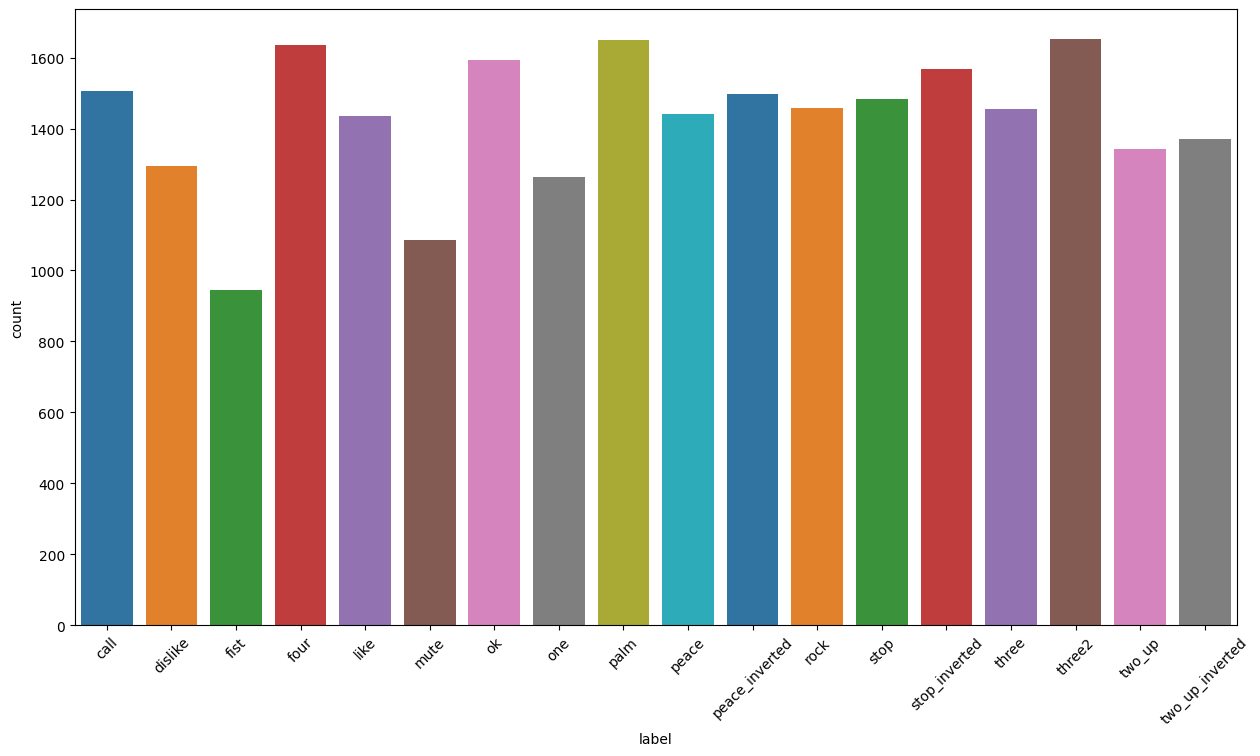

In [35]:
# Plot the classes distributions
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
sns.countplot(data=landmarks_df, x='label', hue='label', palette='tab10')
plt.show()

# Observations:
# - While some variation exists, the dataset does not exhibit significant class imbalance
# - "Fist" has the lowest representation, followed by "mute" & "one".
# - "Three2" followed by "palm" & "four" have the largest portion.

### **3- Data Plotting**

**A- 3D Plotting**

<ipython-input-36-45a36d8ffe16>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_coord = sample_series[landmark]
<ipython-input-36-45a36d8ffe16>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_coord = sample_series[landmark+1]
<ipython-input-36-45a36d8ffe16>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_coord = sample_series[landmark+2]
<ipython-input-36-45a36d8ffe16>:32: FutureWarning: Series.__getitem__ treating keys 

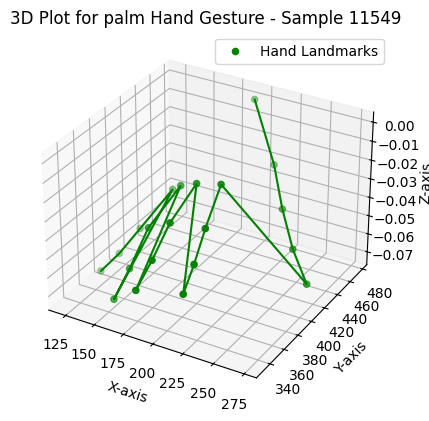

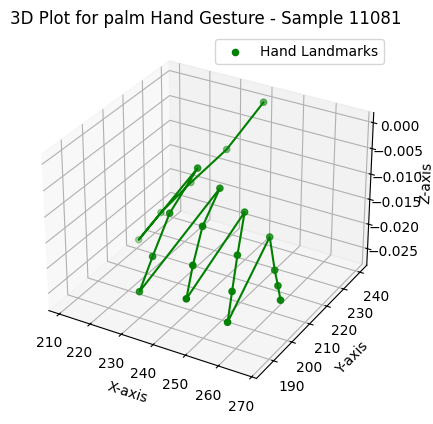

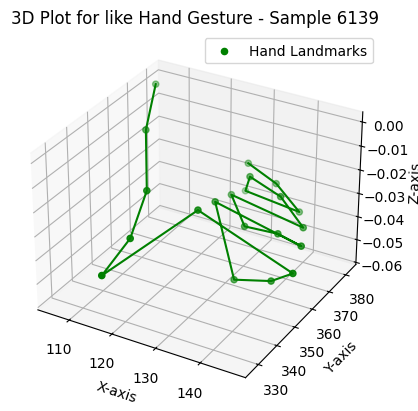

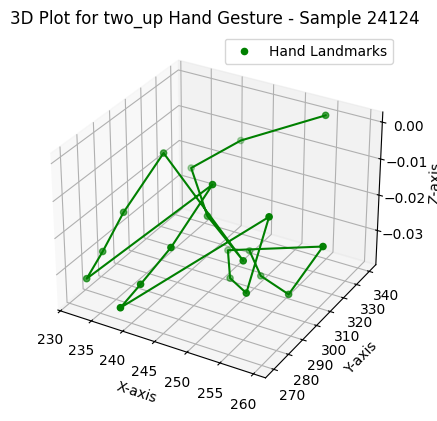

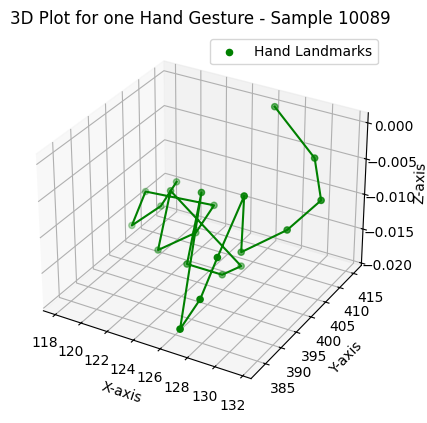

In [36]:
random_indicies = np.random.randint(low=0, high=n_observations-1, size=5)       # Generate 5 random indicies, to be used for visualization of the corresponding samples from the dataset

# Iterate through the coordinates data for each random sample
for sample_idx in random_indicies:

  sample_series = landmarks_df.iloc[sample_idx]       # Get the samples data
  x_coords, y_coords, z_coords = [], [], []           # Initialize empty lists to store the coordinates data

  for landmark in range(0, n_columns-2, 3):

    # Extract the landmarks coordinates
    x_coord = sample_series[landmark]
    y_coord = sample_series[landmark+1]
    z_coord = sample_series[landmark+2]

    x_coords.append(x_coord)
    y_coords.append(y_coord)
    z_coords.append(z_coord)


  fig = plt.figure()
  ax = plt.axes(projection ='3d')         # axes for 3-D projection

  # Plot landmarks
  ax.scatter3D(x_coords, y_coords, z_coords, c='green', marker='o', label="Hand Landmarks")
  ax.plot3D(x_coords, y_coords, z_coords, 'green')

  # Set labels and title
  ax.set_xlabel("X-axis")
  ax.set_ylabel("Y-axis")
  ax.set_zlabel("Z-axis")
  ax.set_title(f'3D Plot for {sample_series[-1]} Hand Gesture - Sample {sample_idx}')

  # Display the plot
  ax.legend()
  plt.show()

**B- 2D Plotting**

<ipython-input-37-6f19f29d4788>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_coord = sample_series[landmark]
<ipython-input-37-6f19f29d4788>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_coord = sample_series[landmark+1]
<ipython-input-37-6f19f29d4788>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_title(f'2D Plot for {sample_series[-1]} Hand Gesture - Sample {sample_idx}')


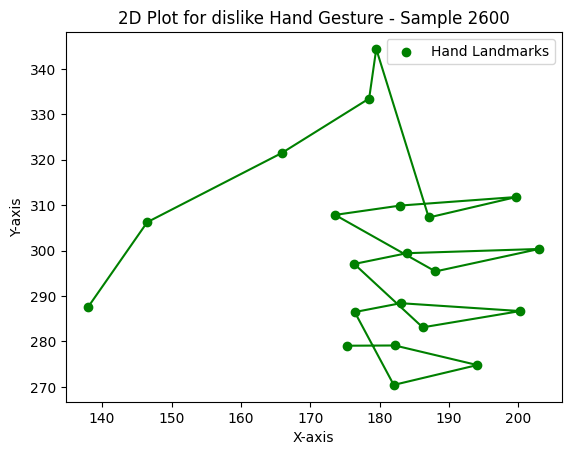

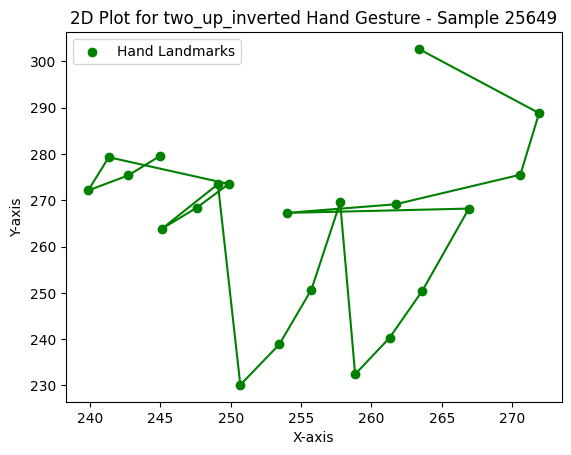

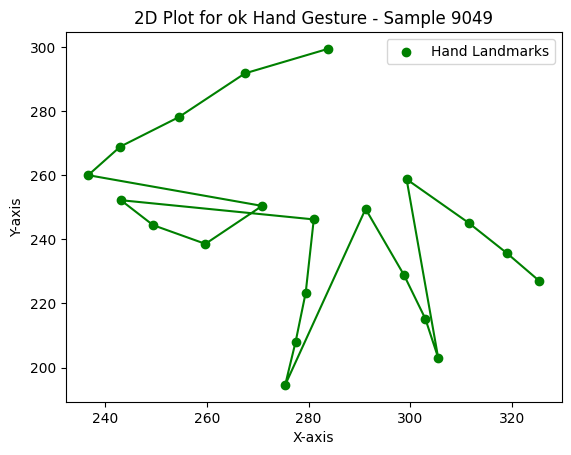

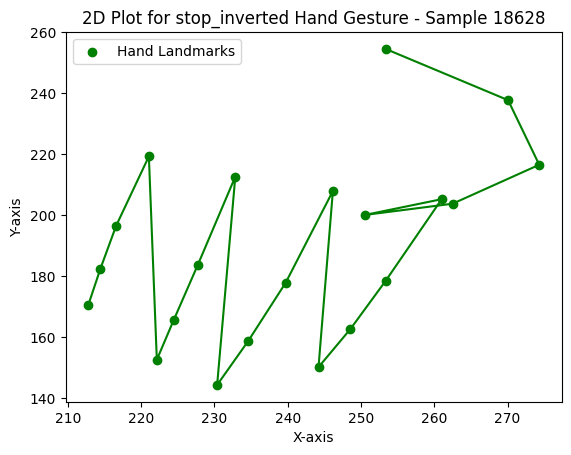

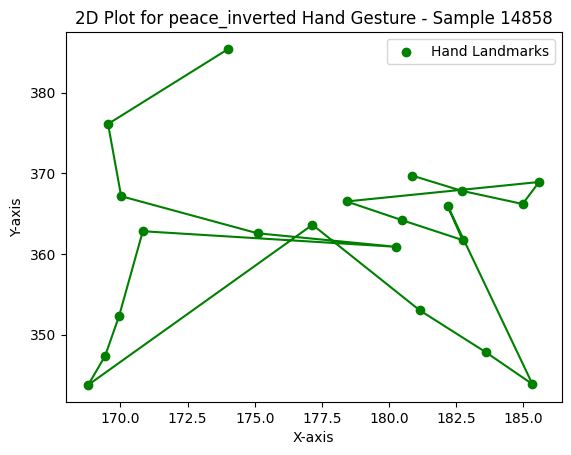

In [37]:
random_indicies = np.random.randint(low=0, high=n_observations-1, size=5)       # Generate 5 random indicies, to be used for visualization of the corresponding samples from the dataset

# Iterate through the coordinates data for each random sample
for sample_idx in random_indicies:

  sample_series = landmarks_df.iloc[sample_idx]       # Get the samples data
  x_coords, y_coords = [], []         # Initialize empty lists to store the coordinates data

  for landmark in range(0, n_columns-2, 3):

    # Extract the landmarks coordinates
    x_coord = sample_series[landmark]
    y_coord = sample_series[landmark+1]

    x_coords.append(x_coord)
    y_coords.append(y_coord)


  # Define the figure & axes
  fig, ax = plt.subplots()

  # Plot landmarks
  ax.scatter(x_coords, y_coords, c='green', marker='o', label="Hand Landmarks")
  ax.plot(x_coords, y_coords, 'green')

  # Set labels and title
  ax.set_xlabel("X-axis")
  ax.set_ylabel("Y-axis")
  ax.set_title(f'2D Plot for {sample_series[-1]} Hand Gesture - Sample {sample_idx}')

  # Display the plot
  ax.legend()
  plt.show()

### **4- Data Scaling**

In [15]:
# We need to center by subtracting the wrist position, followed by averaging with the middle finger tip position
# Wrist = 0, index (x1, y1, z1)
# Middle finger tip = 12, index (x13, y13, z13)

def center_landmarks(col):

    '''
    Function to center the coordinates by subtracting from the wrist coordinates. Ignore z coordinates as it is already scaled.

    Args:
      col (pandas.series) : The dataframe column we want to center, as a pandas series. Center by subtracting wrist position.

    Returns:
      col (pandas.series) : The centered dataframe column, as a pandas series.
    '''

    col_name = col.name       # Extract column name

    # Check if it is the x or y coordinate first, otherwise neglect the column
    if 'x' in col_name:
      col = (col - landmarks_df['x1'])

    elif 'y' in col_name:
      col = (col - landmarks_df['y1'])

    return col



def normalize_landmarks(col):

    '''
    Function to normalize the centered coordinates by dividing with the mid-finger tip coordinates. Ignore z coordinates as it is already scaled.

    Args:
      col (pandas.series) : The dataframe column we want to normalize, as a pandas series. Normalize by dividing middle finger tip position.

    Returns:
      col (pandas.series) : The normalized dataframe column, as a pandas series.
    '''

    col_name = col.name       # Extract column name

    # Check if it is the x or y coordinate first, otherwise neglect the column
    if 'x' in col_name:
      col = col / landmarks_df['x13']

    elif 'y' in col_name:
      col = col / landmarks_df['y13']

    return col

In [16]:
# Copy the dataframe, to avoid information loss
landmarks_df_copy = landmarks_df.copy()

In [17]:
# Center the coordinates
centered_landmarks_df_copy = landmarks_df_copy.apply(center_landmarks, axis=0)

In [18]:
# Apply normalization to the centered coordinates
normalized_landmarks_df = centered_landmarks_df_copy.apply(normalize_landmarks, axis=0)

In [19]:
# Update the Original Dataframe to be the normalized version
landmarks_df = normalized_landmarks_df

In [20]:
# Observe the newly scaled dataframe
landmarks_df.head(5)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.022577,-0.038439,0.004224,-0.067860,-0.058768,0.005798,-0.112987,...,-0.169036,-0.006840,-0.020450,-0.204721,0.003053,-0.024577,-0.234969,0.008685,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.012495,-0.053144,-0.011102,0.058926,-0.104862,-0.021096,0.107634,...,0.430008,-0.012953,-0.038175,0.520406,-0.009810,-0.037336,0.604990,-0.009243,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.033226,-0.073739,-0.000184,0.084116,-0.143944,-0.009687,0.119285,...,0.269757,0.032943,-0.044068,0.322050,0.043470,-0.040469,0.367617,0.047390,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.003506,-0.034615,-0.002824,0.012299,-0.067426,-0.008911,0.020067,...,0.223895,-0.007010,-0.027622,0.267296,-0.005898,-0.027863,0.303876,-0.006411,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.001294,-0.110079,-0.002884,0.015031,-0.245373,-0.008115,0.017717,...,0.178724,-0.075604,-0.025113,0.217087,-0.088218,-0.024087,0.248945,-0.105848,-0.023486,call


In [21]:
# Observe the scales of each coordinate after scaling
landmarks_df.describe()

# Observations:
# Coordinates now have close scales

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.0,25675.0,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,0.0,0.0,1.272461e-07,0.020571,-0.051586,-0.009465,0.034870,-0.126689,-0.015946,0.037230,...,-0.024129,-0.018263,-0.223927,-0.033751,-0.015732,-0.223694,-0.032208,-0.013394,-0.224378,-0.028828
std,0.0,0.0,2.737932e-07,0.091574,0.076773,0.010376,0.148363,0.166001,0.013973,0.175282,...,0.015658,0.174642,0.287031,0.020453,0.166174,0.306212,0.020877,0.161715,0.330848,0.021136
min,0.0,0.0,-2.029986e-06,-0.712127,-2.476977,-0.096630,-1.056953,-4.576302,-0.155846,-1.366593,...,-0.201897,-3.116995,-7.426949,-0.286821,-2.613243,-8.665405,-0.286470,-2.058394,-9.688677,-0.262047
25%,0.0,0.0,-5.243216e-08,-0.039878,-0.065123,-0.015199,-0.063156,-0.154427,-0.023020,-0.061715,...,-0.030728,-0.106245,-0.275834,-0.042726,-0.096566,-0.280252,-0.041957,-0.087088,-0.286631,-0.039220
50%,0.0,0.0,1.497277e-07,0.019289,-0.039642,-0.008737,0.026622,-0.098777,-0.014231,0.011426,...,-0.020969,-0.014561,-0.167492,-0.029942,-0.009446,-0.159556,-0.028510,-0.005623,-0.146023,-0.025269
75%,0.0,0.0,2.989988e-07,0.065625,-0.023163,-0.002783,0.105490,-0.062757,-0.007134,0.103053,...,-0.013661,0.068087,-0.095135,-0.019987,0.066462,-0.081122,-0.017971,0.064855,-0.066679,-0.014294
max,0.0,0.0,1.876254e-06,1.424227,0.289532,0.076365,2.036049,0.579496,0.094131,3.000921,...,0.031774,1.648382,0.433124,0.078105,1.412090,0.534002,0.104580,1.170695,0.607066,0.118668


### **5- Data Splitting**

In [ ]:
# Split the Dataset to training & testing sets, with 80% of the dataset for training & the rest (20%) for testing
X_train, X_test, y_train, y_test = train_test_split(landmarks_df.drop(columns=['label'], inplace=False), landmarks_df['label'], test_size=0.2, random_state=42)

In [ ]:
# Observe the training Features
X_train.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
7330,0.0,0.0,-7.949529e-08,0.093630,-0.026045,-0.006374,0.149770,-0.064869,-0.017884,0.197858,...,-0.039041,0.163972,-0.141894,-0.050576,0.147242,-0.103631,-0.045012,0.110736,-0.093512,-0.038280
19295,0.0,0.0,1.827579e-07,0.043327,-0.101924,-0.004533,0.059769,-0.242396,-0.007546,0.042036,...,-0.019523,-0.061726,-0.409478,-0.025103,-0.066135,-0.491650,-0.028301,-0.069391,-0.561219,-0.030005
13987,0.0,0.0,3.728866e-07,-0.077389,-0.085024,-0.001540,-0.069425,-0.157973,-0.008423,0.009383,...,-0.033196,0.130553,-0.174093,-0.034893,0.103662,-0.156297,-0.027841,0.091869,-0.131764,-0.020865
826,0.0,0.0,-2.375691e-07,-0.018987,-0.102939,-0.000950,-0.059872,-0.213759,-0.004560,-0.083272,...,-0.013261,-0.237893,0.050861,-0.018608,-0.271049,0.104221,-0.021931,-0.301369,0.140460,-0.024395
3008,0.0,0.0,-2.835380e-07,-0.034749,-0.029599,-0.008786,-0.059707,-0.074686,-0.011174,-0.075013,...,-0.008994,0.027322,-0.087346,-0.016447,0.017146,-0.063278,-0.011383,0.013466,-0.057757,-0.005584


In [ ]:
# Observe the training Labels
y_train.head()

,label
7330,mute
19295,stop_inverted
13987,peace_inverted
826,call
3008,fist


In [ ]:
# Observe the distribution of classes in train set
y_train.value_counts()

,count
label,
palm,1332
three2,1322
four,1309
stop_inverted,1258
ok,1252
call,1219
peace_inverted,1190
stop,1189
rock,1168


In [ ]:
# Observe the test Features
X_test.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
15547,0.0,0.0,-1.364913e-07,0.130929,-0.027754,-0.006056,0.229338,-0.071304,-0.007665,0.195608,...,-0.010495,-0.062845,-0.183128,-0.017441,-0.068572,-0.211857,-0.016371,-0.072642,-0.236819,-0.013156
12626,0.0,0.0,1.828926e-07,0.052103,-0.035823,-0.006244,0.066885,-0.094938,-0.009010,0.044287,...,-0.010427,-0.062851,-0.136989,-0.015973,-0.054263,-0.120317,-0.013603,-0.047831,-0.100574,-0.009864
17388,0.0,0.0,3.240966e-07,0.139969,-0.078284,-0.020723,0.199243,-0.195948,-0.029005,0.206473,...,-0.026622,-0.309985,-0.341632,-0.037153,-0.313857,-0.408092,-0.039971,-0.311420,-0.467810,-0.040992
6404,0.0,0.0,-3.065760e-07,0.025207,-0.050834,-0.006879,0.073894,-0.089757,-0.016994,0.117779,...,-0.022604,0.233871,0.006425,-0.021883,0.207960,0.003762,-0.014091,0.179162,0.008415,-0.009014
752,0.0,0.0,-2.403263e-07,-0.022890,-0.050987,-0.001529,-0.066687,-0.107673,-0.007143,-0.090812,...,-0.030162,-0.190334,0.009168,-0.035060,-0.238933,0.014476,-0.035364,-0.276083,0.015458,-0.035845


In [ ]:
# Observe the test Labels
y_test.head()

,label
15547,rock
12626,peace
17388,stop
6404,like
752,call


In [ ]:
# Observe the distribution of classes in test set
y_test.value_counts()

,count
label,
ok,340
three2,331
four,325
palm,317
stop_inverted,309
peace_inverted,307
like,304
three,298
stop,293


In [ ]:
print('Shape of the train features is:', X_train.shape)
print('Shape of the test features is:', X_test.shape)

print('Shape of the train labels is:', y_train.shape)
print('Shape of the test labels is:', y_test.shape)

Shape of the train features is: (20540, 63)
Shape of the test features is: (5135, 63)
Shape of the train labels is: (20540,)
Shape of the test labels is: (5135,)


## **Model Building**


- This phase involves building various classical machine learning models and fine-tuning their hyperparameters to analyze performance variations. Models with the highest evaluation metrics are selected to construct a final voting classifier, ensuring robustness and reducing bias from relying on a single algorithm.


- Hyperparameter tuning was performed using both grid search (sklearn.model_selection.GridSearchCV) and manual tuning. The best results were achieved through manual hyperparameter selection.

### **1- Support Vector Machines (SVM)**

#### **A- One VS. One Linear Kernel Approach**

In [ ]:
# clf_svm_ovo_linear = svm.SVC(kernel='linear', decision_function_shape='ovo', random_state=42)   # Larger C → Larger α values, Higher influence of errors, Smaller margin, less regularization, more overfitting
# clf_svm_ovo_linear = clf_svm_ovo_linear.fit(X_train, y_train)     # Trains => C(C-1)/2 binary classifiers

#### **B- One VS. Rest Linear Kernel Approach**

In [ ]:
# Train a Support Vector machine Model with Linear Kernel, and having the following setup
# Since we have a multi-class problem, and svm naturally deals with binary classes, we will be using the One Vs. Rest Approach
# Thus, we will end up with => C binary classifiers, where C is the number of classes
# Larger C → Larger α values, Higher influence of errors, Smaller margin, less regularization, more overfitting

clf_svm_ovr_linear = svm.LinearSVC(loss='hinge', C=2, multi_class='ovr', fit_intercept=True, intercept_scaling=1, verbose=1, random_state=42, max_iter=3000)
clf_svm_ovr_linear = clf_svm_ovr_linear.fit(X_train, y_train)     # c= 2 , test_acc = 81.3632 %

[LibLinear]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### **C- One VS. Rest RBF Kernel Approach**

In [ ]:
# Train a Support Vector machine Model with Radial Basis Function Kernel, and having the following setup
# Since we have a multi-class problem, and svm naturally deals with binary classes, we will be using the One Vs. Rest Approach
# Thus, we will end up with => C binary classifiers, where C is the number of classes
# Larger C → Larger α values, Higher influence of errors, Smaller margin, less regularization, more overfitting

clf_svm_ovr_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=370, decision_function_shape='ovr', random_state=42)
clf_svm_ovr_rbf = clf_svm_ovr_rbf.fit(X_train, y_train)            # c= 370, gamma=0.5, test_acc = 97.2736 %

#### **D- One VS. Rest Polynomial Kernel Approach**

In [ ]:
# Train a Support Vector machine Model with Polynomial Kernel, and having the following setup
# Since we have a multi-class problem, and svm naturally deals with binary classes, we will be using the One Vs. Rest Approach
# Thus, we will end up with => C binary classifiers, where C is the number of classes
# Larger C → Larger α values, Higher influence of errors, Smaller margin, less regularization, more overfitting

clf_svm_ovr_poly = svm.SVC(kernel='poly', degree=3, gamma=10, C=2, decision_function_shape='ovr', random_state=42)
clf_svm_ovr_poly = clf_svm_ovr_poly.fit(X_train, y_train)           # degree=3, gamma=10, C=2,  Accuracy: 97.7994 %

### **2- Random Forest**

In [ ]:
# Train a Random Forest Model, and having the following setup
# Where, n_estimators is the number of trees built
clf_rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
clf_rf = clf_rf.fit(X_train, y_train)       # n_estimators=500, default par, Accuracy: 95.0925 %

### **3- K-Nearest Neighbors (KNN)**

In [ ]:
# Train a K-Nearest Neighbors Model, and having the following setup
clf_knn = KNeighborsClassifier(n_neighbors=4, weights='distance', p=2, n_jobs=-1)
clf_knn = clf_knn.fit(X_train, y_train)     # n_neighbors=4, weights=distance, p=3 with default par, Accuracy: 92.9114 %

### **4- Extreme Gradient Boosting**

In [ ]:
# Encode labels, since xgboost works with numbers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert labels to numbers

# Train XGBoost Model, and having the following setup
clf_xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
clf_xgb = clf_xgb.fit(X_train, y_train_encoded)         # n_estimators=500, learning_rate=0.1, max_depth=3, 97.6241 %

### **5- Extra-trees**

In [ ]:
# Train an Extra-trees Model, and having the following setup
# Where, n_estimators is the number of trees built
clf_et = ExtraTreesClassifier(n_estimators=400, max_features=None, max_depth=50, random_state=42, n_jobs=-1)
clf_et = clf_et.fit(X_train, y_train)       # n_estimators=400, max_features=None, max_depth=None, 96.4557 %

## **Model Evaluation**

This phase focuses on assessing the performance of the trained models and selecting the top-performing ones for the final ensemble:



- Each trained model is evaluated based on key performance metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **confusion matrix**.

- The top five models with the best evaluation metrics are selected.

- These models are then combined to form a voting classifier, ensuring robustness and reducing the risk of bias from a single model.

In [ ]:
def evaluate_model(y_pred, x_test, y_test) -> tuple:
  '''
  Function to evaluate the given predictions of a classification model based on several evaluation metrics like: accuracy, f1-score, precision, recall,
  and also visualizing the output predictions using the confusion matrix.

  Args:
    y_pred (numpy.ndarray): The predictions of the classification model to be evaluated.
    x_test (pd.DataFrame): The feature set for testing.
    y_test (pd.DataFrame): The ground truth labels.

  Returns:
    tuple: (accuracy, precision, recall, f1) containing:
        - accuracy (float): The accuracy of the classification model. i.e Proportion of correctly classified samples.
        - precision (float): The precision of the classification model. i.e Proportion of correctly predicted positive samples out of all predicted positives.
        - recall (float): The recall () of the classification model. i.e Proportion of correctly predicted positive samples out of all actual positives.
        - f1 (float): The f1_score of the classification model. i.e Harmonic mean of precision and recall.
  '''

  # Calculate accuracy of the overall performance
  accuracy = accuracy_score(y_test, y_pred)

  # Get weighted metrics
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  cm = confusion_matrix(y_test, y_pred)

  # Print Metrics
  print(f"Accuracy: {accuracy * 100:.4f} %")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")

  # Plot Confusion Matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()


  return accuracy, precision, recall, f1

#### **1- SVM OvO with Linear Kernel**

In [ ]:
# Evaluate the One VS. One SVM Model (Linear Kernel)
# svm_ovo_linear_y_pred = clf_svm_ovo_linear.predict(X_test)    # Predict labels for test data
# svm_ovo_linear_accuracy, svm_ovo_linear_precision, svm_ovo_linear_recall, svm_ovo_linear_f1 = evaluate_model(svm_ovo_linear_y_pred, X_test, y_test)

#### **2- SVM OvR with Linear Kernel**

Accuracy: 81.3632 %
Precision: 0.8143
Recall: 0.8136
F1-score: 0.8120


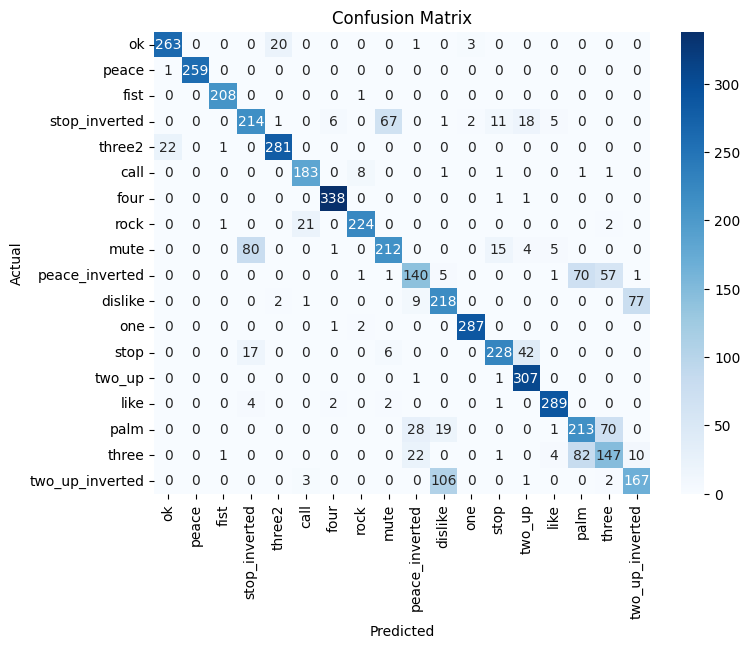

In [ ]:
# Evaluate the One VS. Rest SVM Model (Linear Kernel)
svm_ovr_linear_y_pred = clf_svm_ovr_linear.predict(X_test)    # Predict labels for test data
svm_linear_accuracy, svm_linear_precision, svm_linear_recall, svm_linear_f1 = evaluate_model(svm_ovr_linear_y_pred, X_test, y_test)

#### **3- SVM OvR with RBF Kernel**

Accuracy: 97.2736 %
Precision: 0.9728
Recall: 0.9727
F1-score: 0.9727


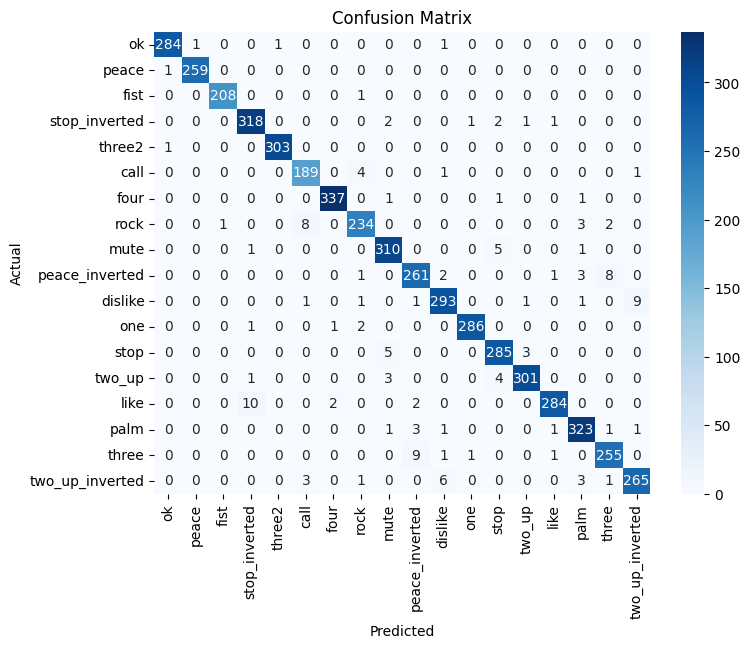

In [ ]:
# Evaluate the One VS. Rest SVM Model (RBF Kernel)
svm_ovr_rbf_y_pred = clf_svm_ovr_rbf.predict(X_test)    # Predict labels for test data
svm_rbf_accuracy, svm_rbf_precision, svm_rbf_recall, svm_rbf_f1 = evaluate_model(svm_ovr_rbf_y_pred, X_test, y_test)

#### **4- SVM OvR with Polynomial Kernel**

Accuracy: 97.7994 %
Precision: 0.9782
Recall: 0.9780
F1-score: 0.9780


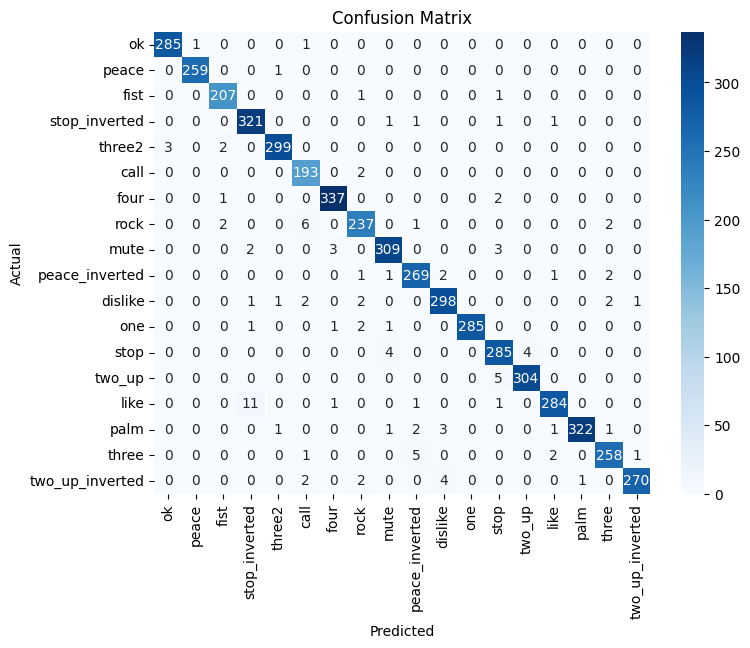

In [ ]:
# Evaluate the One VS. Rest SVM Model (Polynomial Kernel)
svm_ovr_poly_y_pred = clf_svm_ovr_poly.predict(X_test)    # Predict labels for test data
svm_poly_accuracy, svm_poly_precision, svm_poly_recall, svm_poly_f1 = evaluate_model(svm_ovr_poly_y_pred, X_test, y_test)

#### **5- Random Forest**

Accuracy: 95.0925 %
Precision: 0.9514
Recall: 0.9509
F1-score: 0.9510


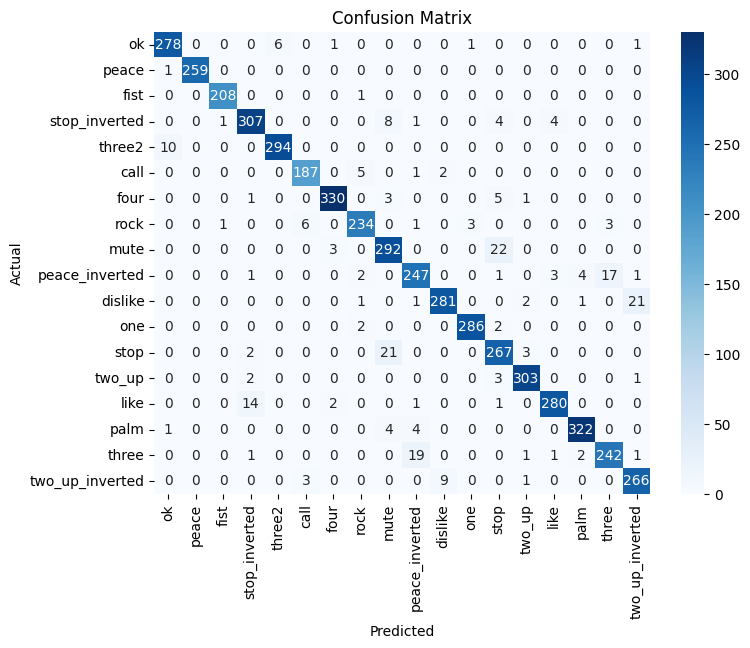

In [ ]:
# Evaluate the Random Forest Model
rf_y_pred = clf_rf.predict(X_test)    # Predict labels for test data
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_y_pred, X_test, y_test)

#### **6- KNN**

Accuracy: 92.5414 %
Precision: 0.9262
Recall: 0.9254
F1-score: 0.9257


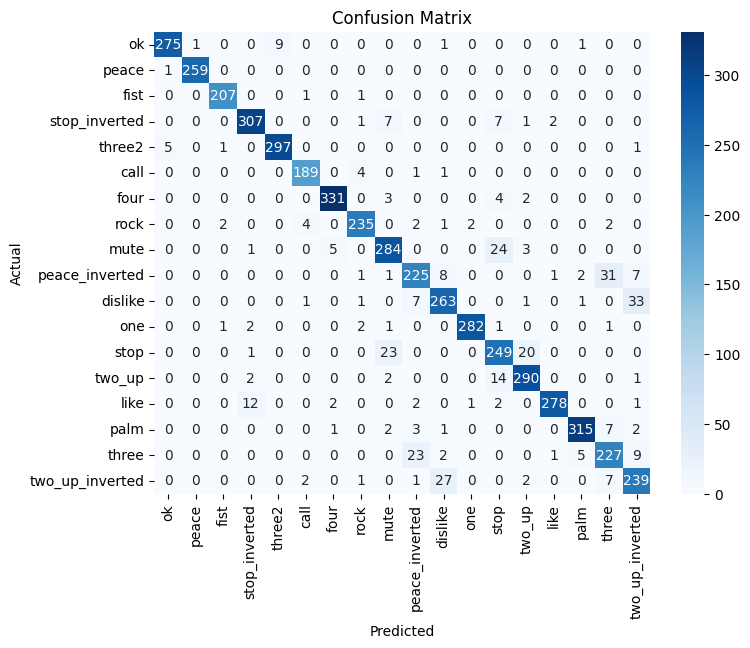

In [ ]:
# Evaluate the K-Nearest Neighbors Model
knn_y_pred = clf_knn.predict(X_test)    # Predict labels for test data
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_model(knn_y_pred, X_test, y_test)

### **7- Extreme Gradient Boosting**

Accuracy: 97.6241 %
Precision: 0.9764
Recall: 0.9762
F1-score: 0.9763


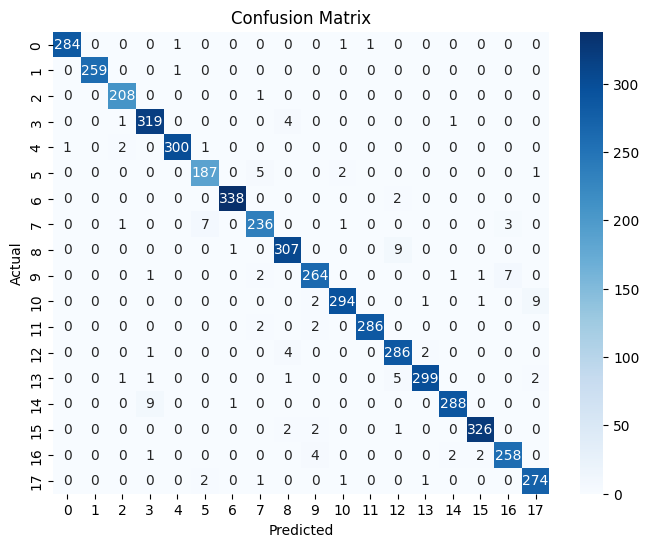

In [ ]:
# Evaluate the Extreme Gradient Boosting Model
y_test_encoded = label_encoder.transform(y_test)        # Encode test labels
xgb_y_pred = clf_xgb.predict(X_test)    # Predict labels for test data
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(xgb_y_pred, X_test, y_test_encoded)

### **8- Extra-trees**

Accuracy: 96.4557 %
Precision: 0.9650
Recall: 0.9646
F1-score: 0.9647


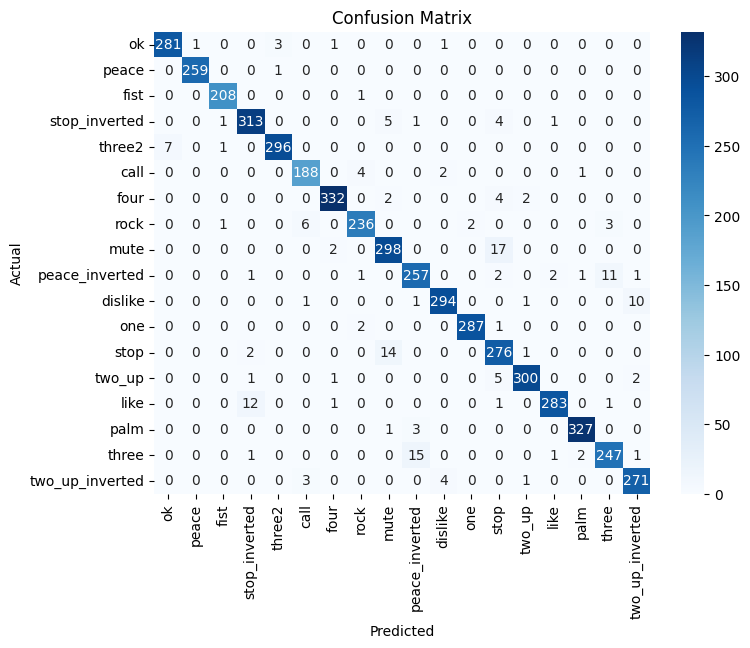

In [ ]:
# Evaluate the Extra Trees Model
et_y_pred = clf_et.predict(X_test)    # Predict labels for test data
et_accuracy, et_precision, et_recall, et_f1 = evaluate_model(et_y_pred, X_test, y_test)

#### **7- Voting Based Approach Classifier (Final Model)**

In [ ]:
def voting_classifier(models, x_test, y_test, label_encoder) -> list:
    '''
    Function to perform majority voting using a set of classifiers.

    Args:
        models (dict): Dictionary of trained models where keys are model names and values are model objects.
        x_test (pd.DataFrame): Feature set for testing.
        y_test (pd.DataFrame): Ground truth labels.
        label_encoder: Encoder to inverse transform predictions.

    Returns:
        final_labels (numpy.ndarray): Final predicted labels after majority voting.
    '''

    # Get predictions from all models using dictionary unpacking
    predictions = {name: model.predict(x_test) for name, model in models.items()}

    # Convert XGBoost predictions to original labels
    predictions["xgb"] = label_encoder.inverse_transform(predictions["xgb"])

    # Perform majority voting
    final_labels = []
    for y_pred in zip(*predictions.values()):

        # Take majority vote
        try:
            pred_label = statistics.mode(y_pred)

        # Default to XGB (highest accuracy), if no mode was found
        except statistics.StatisticsError:
            pred_label = y_pred[-1]

        final_labels.append(pred_label)

    return np.array(final_labels)

Accuracy: 98.0915 %
Precision: 0.9811
Recall: 0.9809
F1-score: 0.9809


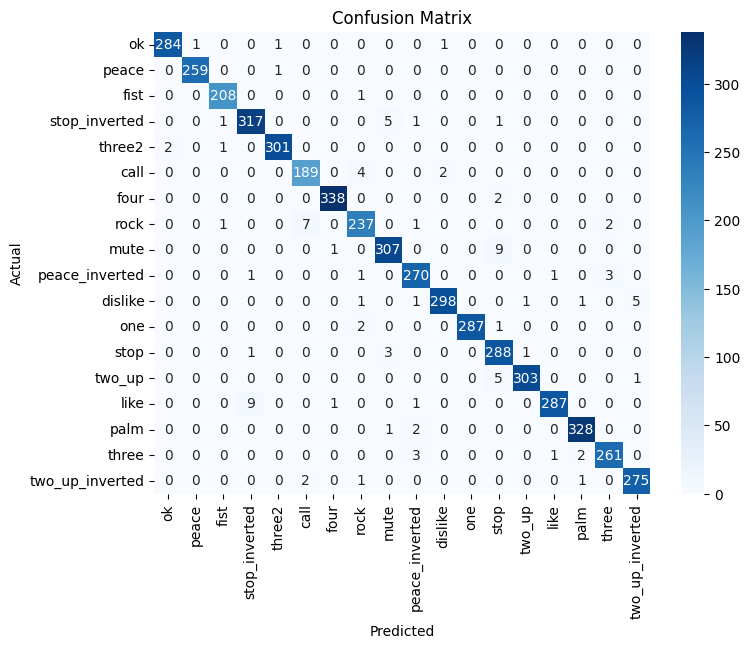

In [ ]:
# Form a dictionary of models with the highest accuracy
models = {'svm_rbf': clf_svm_ovr_rbf,
          'svm_poly': clf_svm_ovr_poly,
          'rf': clf_rf,
          'et': clf_et,
          'xgb': clf_xgb
          }

# Get the Final Labels from the voting classifier
final_labels = voting_classifier(models, X_test, y_test, label_encoder)

# Evaluate the overall performance of the Voting Classifier (Final Model)
final_accuracy, final_precision, final_recall, final_f1 = evaluate_model(final_labels, X_test, y_test)

## **Model Saving**

This phase ensures that the top-performing models and the label encoder are saved for future use.

- Each selected model is stored using serialization (e.g.Pickle) to enable reuse without retraining.

- The label encoder is also saved to maintain consistency in class mappings when making future predictions.

- Saving these components allows for efficient deployment and ensures reproducibility.

In [ ]:
def save_model(model, name, protocol=False) -> None:
  '''
  Function that saves a trained machine learning model or label encoder to a .pkl file.

  Args:
      model (object): The trained model or encoder to be saved.
      name (str): The filename (without extension) for the saved model.
      protocol (bool, optional): If True, uses pickle protocol 5. Default is False.

  Returns:
    None
  '''

  if protocol:
    with open(f"{name}.pkl", "wb") as f:
      dump(model, f, protocol=5)

  else:
    with open(f"{name}.pkl", "wb") as f:
      dump(model, f)

In [ ]:
# Save SVM Model (RBF Kernel)
save_model(clf_svm_ovr_rbf, f"OvR_SVM_RBF_{svm_rbf_accuracy}", True)

# Save SVM Model (Polynomial Kernel)
save_model(clf_svm_ovr_poly, f"OvR_SVM_Poly_{svm_poly_accuracy}", True)

# Save KNN Model
save_model(clf_knn, f"KNN_{knn_accuracy}", True)

# Save Random Forest Model
save_model(clf_rf, f"RandomForest_{rf_accuracy}", True)

# Save Extreme Gradient Boosting Model
save_model(clf_xgb, f"XGB_{xgb_accuracy}", True)

# Save the trained label encoder
save_model(label_encoder, f"label_encoder", True)

# Save Extra Trees Model
save_model(clf_et, f"ExtraTrees_{et_accuracy}", True)

## **Methodology & Conclusion**


- The Support Vector Machine (SVM) with a Polynomial Kernel achieved the highest accuracy (97.8%), closely followed by the Extreme Gradient Boosting (XGB) model (97.6%).

- Instead of relying on a single best-performing model, a combination of the top five models was chosen to enhance robustness and minimize bias. This approach ensures that the model generalizes better, especially under extreme conditions.

- The selected final models were:

    - SVM (Polynomial Kernel) – 97.8%

    - Extreme Gradient Boosting (XGB) – 97.6%

    - SVM (RBF Kernel) – 97.3%

    - Extra-Trees Classifier – 96.5%

    - Random Forest – 95.1%

- By leveraging a Voting Classifier, the final model outperformed all individual models, achieving:

    - Accuracy: 98.09%

    - Precision: 0.9811

    - Recall: 0.9809

    - F1-score: 0.9809

- This demonstrates that ensemble learning can be a powerful technique for improving classification performance, ensuring better generalization, and mitigating model biases.